In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Higgs.tools.ImplementationUtils import implementChainDecayLimit
from Higgs import bounds as HB
from Higgs import predictions as HP
from Higgs import Predictions
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
import MassResolutions as resolution


# ATLAS 13TeV LHC

# ATLAS 8TeV LHC

## `A>Zh125, h125>tautau` [1502.04478](https://arxiv.org/abs/1502.04478)


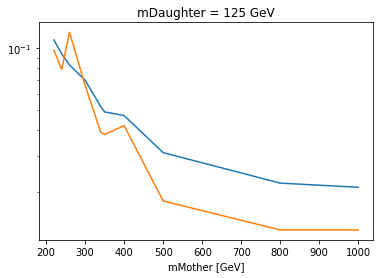

Looks good. Saving this to H_LHC8_ATLAS_20.json


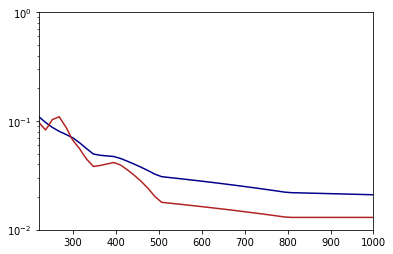

In [2]:
df = pd.DataFrame(
    {
        "mMother": [220, 240, 260, 300, 340, 350, 400, 500, 800, 1000],
        "obs": [0.098, 0.079, 0.12, 0.066, 0.039, 0.038, 0.042, 0.018, 0.013, 0.013],
        "exp": [0.11, 0.094, 0.083, 0.07, 0.052, 0.049, 0.047, 0.031, 0.022, 0.021],
        "mDaughter": 125,
    }
)

limitFile = implementChainDecayLimit(
    "1502.04478",
    {"production": ["H"], "chain": "Z", "decay": ["tautau"]},
    "Aux Tab 4",
    df,
    massResolution={
        "daughter": {
            "absolute": 20,  # guess, may be a lot larger
            "relative": 0.0,
        },
        "mother": resolution.tautau["default"],
    },
    idSuffix=2,  # 1 is h125>bb
)

lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
h1 = pred.addParticle(HP.NeutralScalar("h1"))
hh.setDecayWidth("Z", "h1", 1.0)
h1.setDecayWidth("tautau", 1.0)
h1.setMass(125)
hm = np.linspace(220, 1000)
r = np.linspace(1e-2, 1)


def testAgainstLimit(mass, rate):
    hh.setMass(mass)
    hh.setCxn("LHC8", "ggH", rate)
    app = lim.apply(pred)
    if len(app) == 0:
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
ax.set_yscale("log")
plt.show()
